In [1]:
import numpy as np
import pandas as pd
import stumpy as sp
import os
import sys
import matplotlib.pyplot as plt


In [2]:
# Add module tsmule to system path
import os
import sys
print("Current working dir:", os.getcwd())
sys.path.insert(0, '../../')

from tsmule.sampling.segment import MatrixProfileSegmentation, SAXSegmentation
from tsmule.xai.viz import visualize_segmentation_mask
from tsmule.xai.lime import LimeTS


Current working dir: /Users/lamvo/Dev/research/ts-mule/demo/beijing_air_2_5


In [3]:
import dill 
import matplotlib.pyplot as plt
from tensorflow import keras

data_dir = "."
cnn_model = keras.models.load_model(f'{data_dir}/beijing_air_2_5_cnn_model.h5')
with open(f'{data_dir}/beijing_air_2_5_test_data.dill', 'rb') as f:
    dataset_test = dill.load(f)

# Define a predict fn/model
def predict_(x):
    return cnn_model.predict(x[np.newaxis]).ravel()

# Get a sample
sample = dataset_test[0][0]


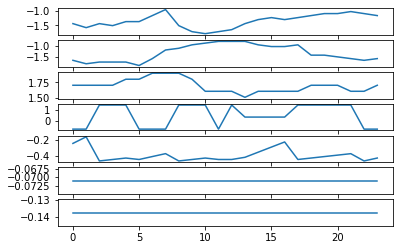

In [4]:

# First insight of the sample
n_steps, features = sample.shape
fig = plt.figure()
for i in range(features):
    fig.add_subplot(features, 1, i+1)
    plt.plot(sample[:,i])
plt.show()


/usr/local/Caskroom/miniconda/base/envs/dev37/lib/python3.7/site-packages/stumpy/core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))
/usr/local/Caskroom/miniconda/base/envs/dev37/lib/python3.7/site-packages/stumpy/core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))
A large number of values are smaller than 1e-05.
For a self-join, try setting `ignore_trivial = True`.
A large number of values are smaller than 1e-05.
For a self-join, try setting `ignore_trivial = True`.


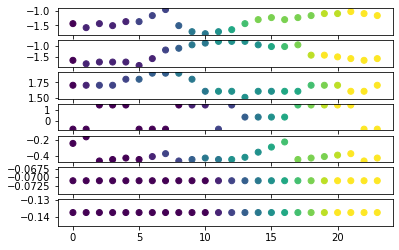

In [5]:
# Define an explainer
explainer = LimeTS()

# Segmentation with slopes-max (default)
seg_m = explainer._segmenter.segment(sample, "slopes-max")
fig = plt.figure()
for i in range(features):
    fig.add_subplot(features, 1, i+1)
    plt.scatter(range(n_steps), sample[:, i], c=seg_m[:, i])
plt.show()

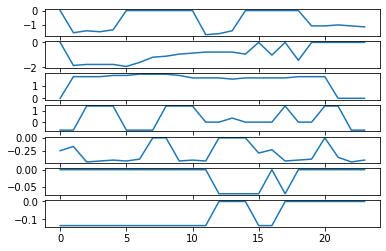

In [6]:

# Samples and binary
perturbed_samples = explainer._sampler.perturb(sample, seg_m)
new_s, z_prime, pi = next(perturbed_samples)
fig = plt.figure()
for i in range(features):
    fig.add_subplot(features, 1, i+1)
    plt.plot(new_s[:,i])
plt.show()


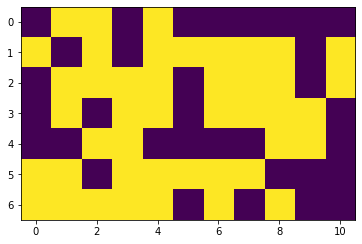

In [7]:

# Plot an on/off binary vector
fig, ax = plt.subplots()
ax.imshow(z_prime.reshape(-1, features).T)
plt.show()


/usr/local/Caskroom/miniconda/base/envs/dev37/lib/python3.7/site-packages/stumpy/core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))
A large number of values are smaller than 1e-05.
For a self-join, try setting `ignore_trivial = True`.
A large number of values are smaller than 1e-05.
For a self-join, try setting `ignore_trivial = True`.


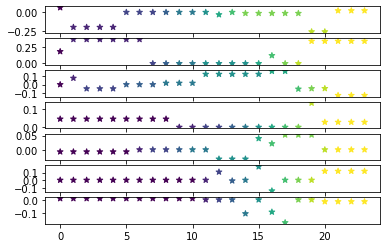

In [8]:

# Explain the model
from sklearn import linear_model, metrics
explainer = LimeTS(n_samples=100)

Lasso = linear_model.Lasso(alpha=.01)
explainer._kernel = Lasso
xcoef = explainer.explain(sample, predict_)

fig = plt.figure()
for i in range(features):
    fig.add_subplot(features, 1, i+1)
    plt.scatter(range(n_steps), xcoef[:, i], c=seg_m[:, i], marker="*")
plt.show()